# Natural Language Processing with Disaster Tweets

In [3]:
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
traindata=pd.read_csv("data/train.csv")
testdata=pd.read_csv("data/test.csv")

In [5]:
traindata.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
testdata.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [12]:
print(f"Train data {traindata.shape}")
print(f"Test data {testdata.shape}")

Train data (7613, 5)
Test data (3263, 4)


In [16]:
print("*********Train Data***************\n")
print(f"{traindata.isnull().sum()}\n")
print("*********Test Data***************\n")
print(f"{testdata.isnull().sum()}\n")

*********Train Data***************

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

*********Test Data***************

id             0
keyword       26
location    1105
text           0
dtype: int64



target
0    4342
1    3271
Name: count, dtype: int64


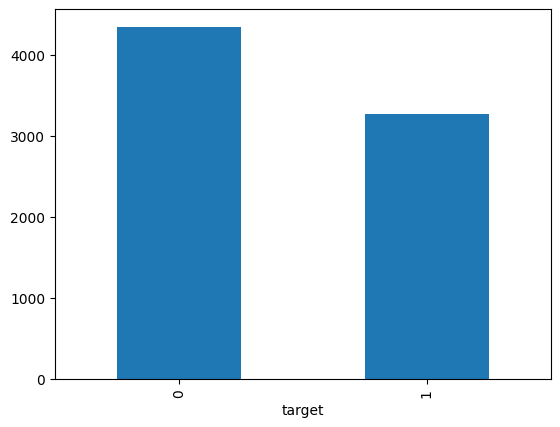

In [24]:
count_t=traindata["target"].value_counts()
print(count_t)
count_t.plot(kind='bar')
plt.show()

In [32]:
# Filter for disaster tweets, then get the keyword counts
disaster_keywords = traindata[traindata['target'] == 1]['keyword'].value_counts()

# Display the top 15
print("Top 15 keywords in DISASTER tweets:")
print(disaster_keywords.head(15))

Top 15 keywords in DISASTER tweets:
keyword
derailment             39
outbreak               39
wreckage               39
debris                 37
oil%20spill            37
typhoon                37
rescuers               32
suicide%20bomb         32
suicide%20bombing      32
evacuated              32
nuclear%20disaster     31
razed                  31
airplane%20accident    30
suicide%20bomber       30
earthquake             30
Name: count, dtype: int64


In [33]:
# Filter for disaster tweets, then get the keyword counts
disaster_keywords = traindata[traindata['target'] == 0]['keyword'].value_counts()

# Display the top 15
print("Top 15 keywords in DISASTER tweets:")
print(disaster_keywords.head(15))

Top 15 keywords in DISASTER tweets:
keyword
body%20bags    40
armageddon     37
harm           37
deluge         36
ruin           36
wrecked        36
explode        35
fear           35
twister        35
siren          35
panic          34
aftershock     34
screaming      34
blizzard       33
blazing        33
Name: count, dtype: int64


In [35]:
import numpy as np 
# 1. Create a column for character count
traindata['char_count'] = traindata['text'].apply(len)

# 2. Create a column for word count
# .split() turns the text into a list of words
traindata['word_count'] = traindata['text'].apply(lambda x: len(x.split()))

# 3. Create a column for average word length
# This calculates the average length of words in each tweet, handling empty tweets.
traindata['avg_word_length'] = traindata['text'].apply(lambda x: np.mean([len(w) for w in x.split()]) if len(x.split()) > 0 else 0)


# Display the first few rows with the new columns to see the result
print("DataFrame with new meta-features:")
print(traindata[['text', 'char_count', 'word_count', 'avg_word_length']].head())

DataFrame with new meta-features:
                                                text  char_count  word_count  \
0  Our Deeds are the Reason of this #earthquake M...          69          13   
1             Forest fire near La Ronge Sask. Canada          38           7   
2  All residents asked to 'shelter in place' are ...         133          22   
3  13,000 people receive #wildfires evacuation or...          65           8   
4  Just got sent this photo from Ruby #Alaska as ...          88          16   

   avg_word_length  
0         4.384615  
1         4.571429  
2         5.090909  
3         7.125000  
4         4.500000  


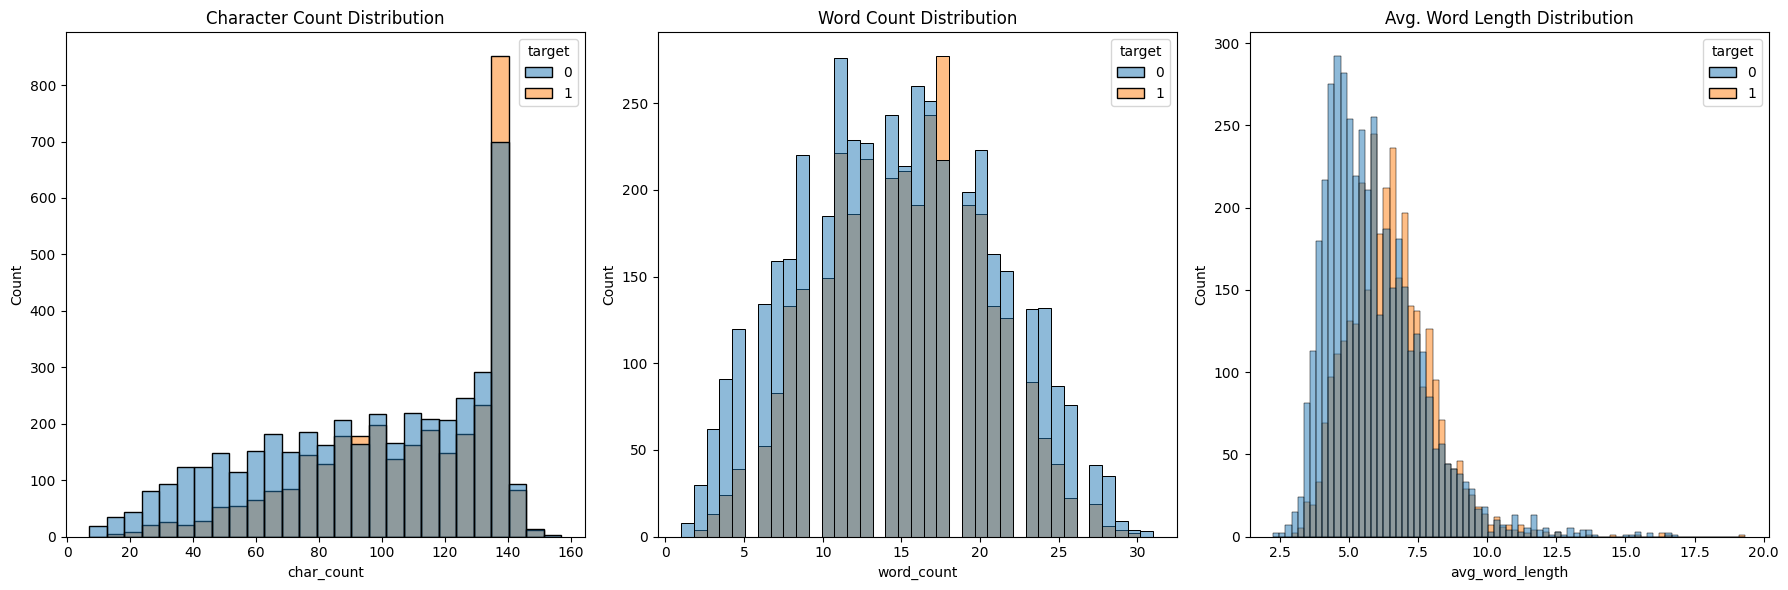

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up a figure with 3 subplots side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- Plot 1: Character Count Distribution ---
sns.histplot(data=traindata, x='char_count', hue='target', ax=axes[0])
axes[0].set_title('Character Count Distribution')

# --- Plot 2: Word Count Distribution ---
sns.histplot(data=traindata, x='word_count', hue='target', ax=axes[1])
axes[1].set_title('Word Count Distribution')

# --- Plot 3: Average Word Length Distribution ---
sns.histplot(data=traindata, x='avg_word_length', hue='target', ax=axes[2])
axes[2].set_title('Avg. Word Length Distribution')

# Display the plots
plt.tight_layout()
plt.show()

In [40]:
import nltk

# Download the list of stop words
nltk.download('stopwords')

# Download the WordNet corpus for lemmatization
nltk.download('wordnet')

# Download the tokenizer models
nltk.download('punkt')

nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sreeh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sreeh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sreeh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sreeh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [41]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # 1. Make text lowercase
    text = text.lower()
    
    # 2. Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # 3. Remove punctuation
    # This also handles the '%20' encoding we found earlier
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    
    # 4. Remove numbers - often they don't help in this context
    text = re.sub(r'\w*\d\w*', '', text)
    
    # 5. Tokenize the text (split into a list of words)
    tokens = word_tokenize(text)
    
    # 6. Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # 7. Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # 8. Join the words back into a single string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# --- Let's test it with an example ---
messy_tweet = "OMG! Our house is on fire!! Check the news http://t.co/news flooding our city with water & debris... #disaster"
cleaned_tweet = clean_text(messy_tweet)

print("Original Tweet:\n", messy_tweet)
print("\nCleaned Tweet:\n", cleaned_tweet)

Original Tweet:
 OMG! Our house is on fire!! Check the news http://t.co/news flooding our city with water & debris... #disaster

Cleaned Tweet:
 omg house fire check news flooding city water debris disaster


In [42]:
# Create a new 'cleaned_text' column in both dataframes
print("Cleaning the training data...")
traindata['cleaned_text'] = traindata['text'].apply(clean_text)

print("Cleaning the testing data...")
testdata['cleaned_text'] = testdata['text'].apply(clean_text)


# Display the first few rows to see the new column
print("\nDataFrame with the new 'cleaned_text' column:")
print(traindata[['text', 'cleaned_text']].head())

Cleaning the training data...
Cleaning the testing data...

DataFrame with the new 'cleaned_text' column:
                                                text  \
0  Our Deeds are the Reason of this #earthquake M...   
1             Forest fire near La Ronge Sask. Canada   
2  All residents asked to 'shelter in place' are ...   
3  13,000 people receive #wildfires evacuation or...   
4  Just got sent this photo from Ruby #Alaska as ...   

                                        cleaned_text  
0         deed reason earthquake may allah forgive u  
1              forest fire near la ronge sask canada  
2  resident asked shelter place notified officer ...  
3  people receive wildfire evacuation order calif...  
4  got sent photo ruby alaska smoke wildfire pour...  


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Initialize the TF-IDF Vectorizer
# We'll set a few parameters:
# - max_features=5000: This will only consider the top 5000 most frequent words.
#   This helps to keep the model focused on the most relevant terms.
# - ngram_range=(1, 2): This tells the vectorizer to consider not just single
#   words (unigrams) but also pairs of adjacent words (bigrams). For example,
#   "forest fire" will be treated as a single feature, which is very powerful.
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))


# 2. Fit the vectorizer on the training data and transform it
# .fit_transform() learns the vocabulary from the data and converts the text
# into a numerical matrix all in one step.
X_train = tfidf_vectorizer.fit_transform(traindata['cleaned_text'])


# 3. Transform the test data
# IMPORTANT: We only use .transform() on the test data. We do NOT fit it again.
# This ensures that the test data is transformed using the exact same vocabulary
# learned from the training data.
X_test = tfidf_vectorizer.transform(testdata['cleaned_text'])


# 4. Prepare the target variable (the labels)
y_train = traindata['target']


# --- Let's check the shape of our new matrices ---
print("Shape of the training data matrix (X_train):", X_train.shape)
print("Shape of the testing data matrix (X_test):", X_test.shape)
print("Shape of the training labels (y_train):", y_train.shape)

Shape of the training data matrix (X_train): (7613, 5000)
Shape of the testing data matrix (X_test): (3263, 5000)
Shape of the training labels (y_train): (7613,)


In [46]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB

# -------------------------------------------------------------------
# Final Model Training (on 100% of the data)
# -------------------------------------------------------------------
print("Training the final model on the entire training dataset...")

# Initialize a new model instance
final_model = MultinomialNB()

# Train the model on the FULL X_train and y_train
final_model.fit(X_train, y_train)

print("Final model training complete.")


# -------------------------------------------------------------------
# Final Predictions
# -------------------------------------------------------------------
print("Making final predictions on the test data...")

# Predict on the Kaggle test data (X_test)
final_predictions = final_model.predict(X_test)


# -------------------------------------------------------------------
# Create Final Submission File
# -------------------------------------------------------------------
print("Creating the final submission file...")

final_submission_df = pd.DataFrame({
    'id': testdata['id'],
    'target': final_predictions
})

# Save the final submission file
final_submission_df.to_csv('final_submission.csv', index=False)


# --- Confirmation ---
print("\nFinal submission file 'final_submission.csv' created successfully!")
print("This is the file you should upload to Kaggle.")
print(final_submission_df.head())

Training the final model on the entire training dataset...
Final model training complete.
Making final predictions on the test data...
Creating the final submission file...

Final submission file 'final_submission.csv' created successfully!
This is the file you should upload to Kaggle.
   id  target
0   0       1
1   2       0
2   3       1
3   9       1
4  11       1


In [47]:
sub=pd.read_csv("final_submission.csv")
sub.shape

(3263, 2)